Support Vector Machines work similiar to the Naive Bayes Gaussian model. There are lines drawn between observations on multiple dimensions that divide the observations into groups. Therefore, it works as a classification model. 

The difference is that SVM works to maximize the margin around a line, rather than minimize some error. Imagine a line with a margin. Now start widening that margin equally on both sides. At some point you will hit an observations. Pivot or translate the line so that you can keep widening the margin. At some point you will be up against 3 points, 2 on one side, 1 on the other. You will no longer be able to turn or slide the line to increase the margin. The becomes the dividing line.

Obviously, SVM works on linear relationships and clear cut groups. You can use modifications for radial or polynomial divisions as well by using a function with exponents or other additions. The model is still linear, but can move and predict in non linear ways.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

%matplotlib inline

## Load and view data

In [2]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer = pd.DataFrame(np.c_[cancer_data['data'], cancer_data['target']], columns = np.append(cancer_data['feature_names'],['target']))
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

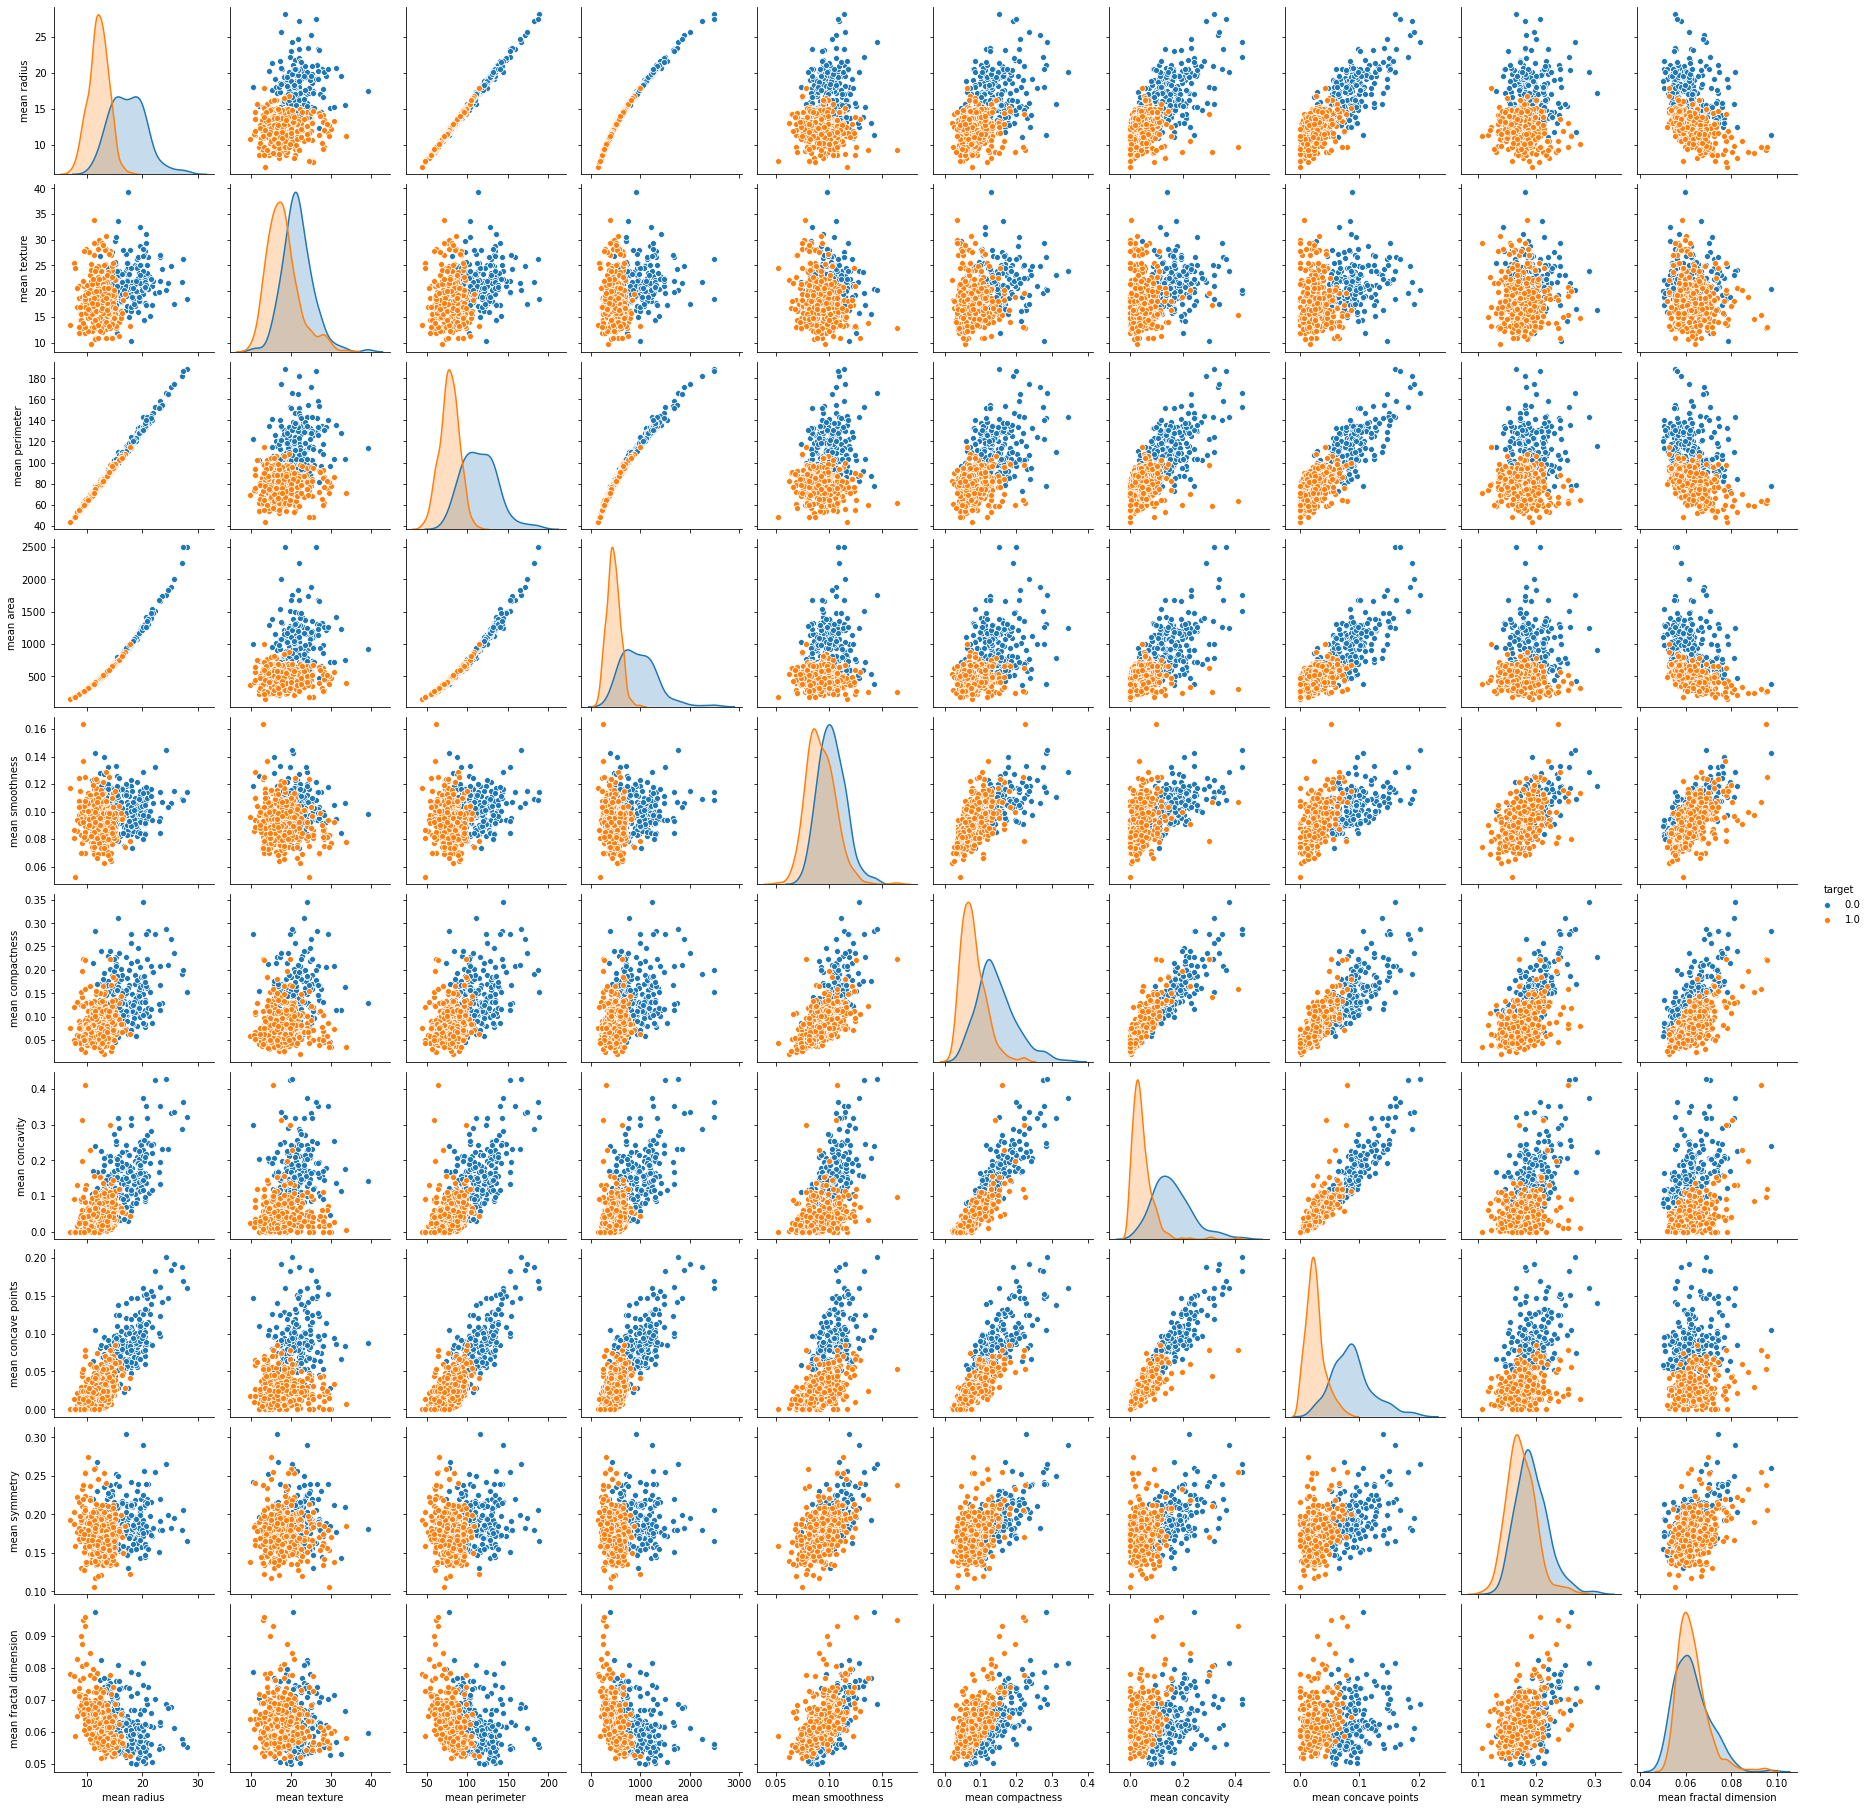

In [5]:
sns.pairplot(cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'])

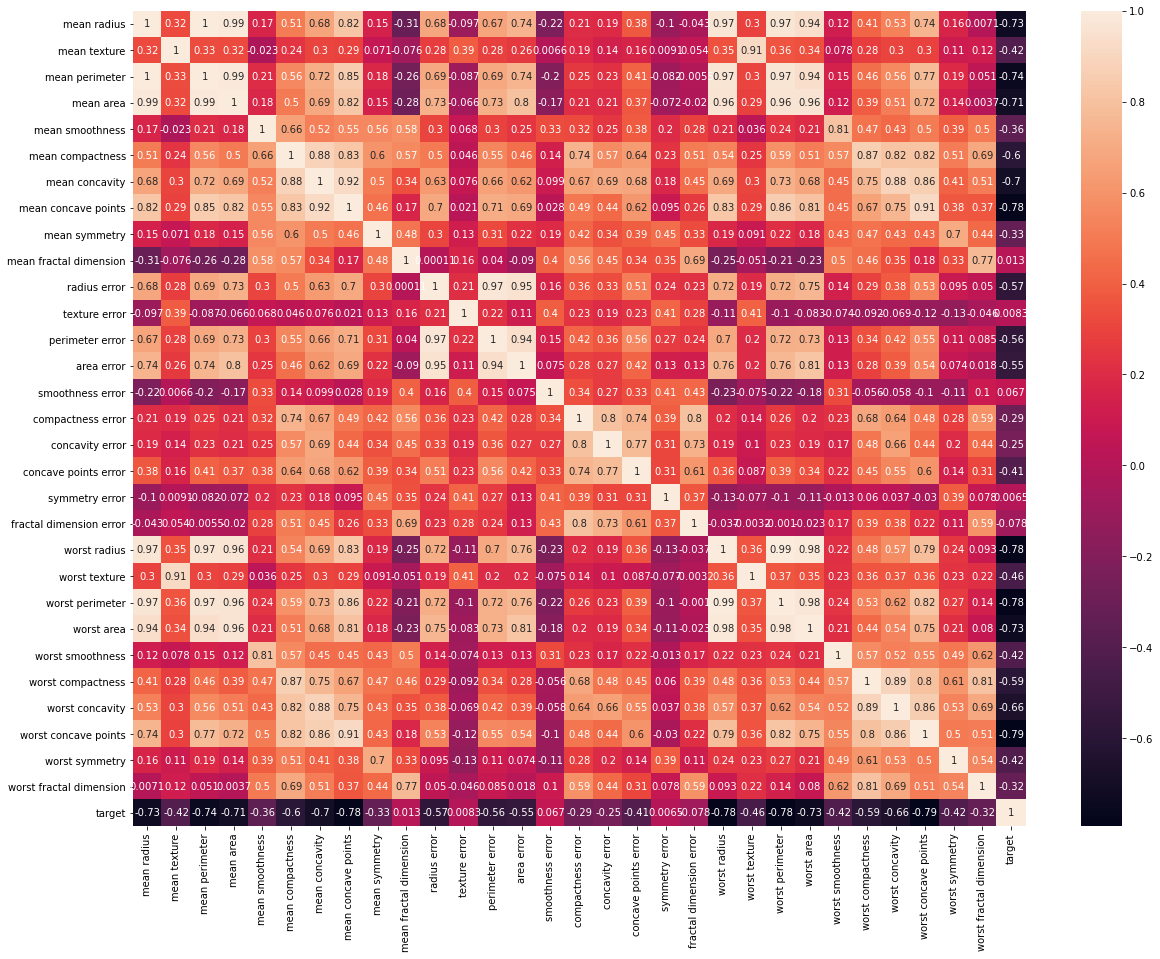

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(cancer.corr(), annot=True)

## Prepare Training & Testing Data

In [7]:
X = cancer.drop(['target'], axis = 1)
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

## Create and Train the model

In [8]:
model = SVC()

In [9]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predict using the model

In [10]:
y_predict = model.predict(X_test)
y_predict[0:9]
# Everyone has cancer?

array([0., 1., 1., 0., 1., 1., 1., 1., 0.])

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
confusion_m = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
c_matrix = pd.DataFrame(confusion_m, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer', 'predicted_healthy'])
c_matrix

,predicted_cancer,predicted_healthy
is_cancer,109,3
is_healthy,8,51


## Normalize Data and Retry

In [13]:
# Scale between 0 and 1
# Find Max, Find Min, Find Range
# (Actual - Min) / Range
# Think of it as "percent of the way throught the range of possibilities"

X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = X_train_max - X_train_min
X_train_normalized = (X_train - X_train_min) / X_train_range
X_train_normalized.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
431,0.256472,0.252595,0.260383,0.137561,0.573151,0.384289,0.181373,0.139115,0.379293,0.443555,...,0.176094,0.281242,0.195229,0.081252,0.495916,0.223292,0.205385,0.257063,0.195348,0.252853
389,0.594870,0.443945,0.588142,0.437116,0.525361,0.384974,0.434864,0.507455,0.469192,0.187026,...,0.458556,0.484480,0.456148,0.277182,0.341112,0.202290,0.327265,0.636554,0.199290,0.137610
309,0.287236,0.119723,0.268952,0.164199,0.335506,0.061537,0.010682,0.043882,0.198485,0.109941,...,0.241907,0.132524,0.216893,0.119740,0.158304,0.023591,0.015590,0.123195,0.106840,0.070576
111,0.267358,0.359170,0.265082,0.142906,0.507223,0.347647,0.249531,0.299254,0.340909,0.436816,...,0.192102,0.350337,0.192191,0.084103,0.369117,0.186269,0.189402,0.385420,0.130298,0.195592
35,0.461877,0.387889,0.458227,0.307953,0.472141,0.391138,0.315839,0.299105,0.422222,0.139006,...,0.429740,0.446154,0.413815,0.256538,0.583820,0.341103,0.462308,0.632368,0.650108,0.205234


In [14]:
X_test_min = X_test.min()
X_test_max = X_test.max()
X_test_range = X_test_max - X_test_min
X_test_normalized = (X_test - X_test_min) / X_test_range

In [15]:
normalized_model = SVC()

In [17]:
normalized_model.fit(X_train_normalized, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_predict_2 = normalized_model.predict(X_test_normalized)

In [19]:
confusion_m = np.array(confusion_matrix(y_test, y_predict_2, labels=[1,0]))
c_matrix = pd.DataFrame(confusion_m, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer', 'predicted_healthy'])
c_matrix

,predicted_cancer,predicted_healthy
is_cancer,96,16
is_healthy,0,59


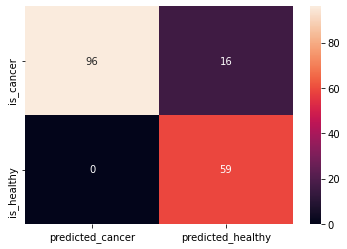

In [20]:
sns.heatmap(c_matrix, annot=True)

In [21]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        59
         1.0       1.00      0.86      0.92       112

    accuracy                           0.91       171
   macro avg       0.89      0.93      0.90       171
weighted avg       0.93      0.91      0.91       171

